In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import miniTRB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
if __name__ == "__main__":
    miniTRB.convert("/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/","draft/HF000T_PL_009.cal","data/HF000T_PL_007.dat", True, False)

Entering conversion loop ...
Reading calibration file /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/draft/HF000T_PL_009.cal
Reading data file /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/data/HF000T_PL_007.dat
File endianess is 'Little Endian'
File /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/data/HF000T_PL_007.dat is raw data file
File from miniTRB 6VA version
Saving data to file /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/txt/data/HF000T_PL_007.dat.csv as reduced signal value
Found 1739 events


In [3]:
if __name__ == "__main__":
    data = miniTRB.compress("/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/","draft/HF000T_PL_003.cal","data/HF000T_PL_007.dat", False)

Entering compression loop ...
Reading calibration file /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/draft/HF000T_PL_003.cal
Reading data file /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/data/HF000T_PL_007.dat
File endianess is 'Little Endian'
File /home/gsilvest/Work/Dec2019_FOOT_data/HF000T/data/HF000T_PL_007.dat is raw data file
File from miniTRB 6VA version
Saving data as raw signal value
Found 1739 events


In [2]:
filename = '/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/txt/data/HF000T_PL_012.dat.csv'
data = np.loadtxt(filename, dtype="float", delimiter=",")
CLUSTERS = miniTRB.clusterize(data, 40, 20, cn_type=-1)

Clustering event 53761

In [3]:
cn = np.array([], dtype=float)

for event in range(data.shape[0]):
    for chip in range(6):
        cn = np.append(cn, miniTRB.common_noise(data, event, chip, type=0))

Text(0.5, 0, 'ADC')

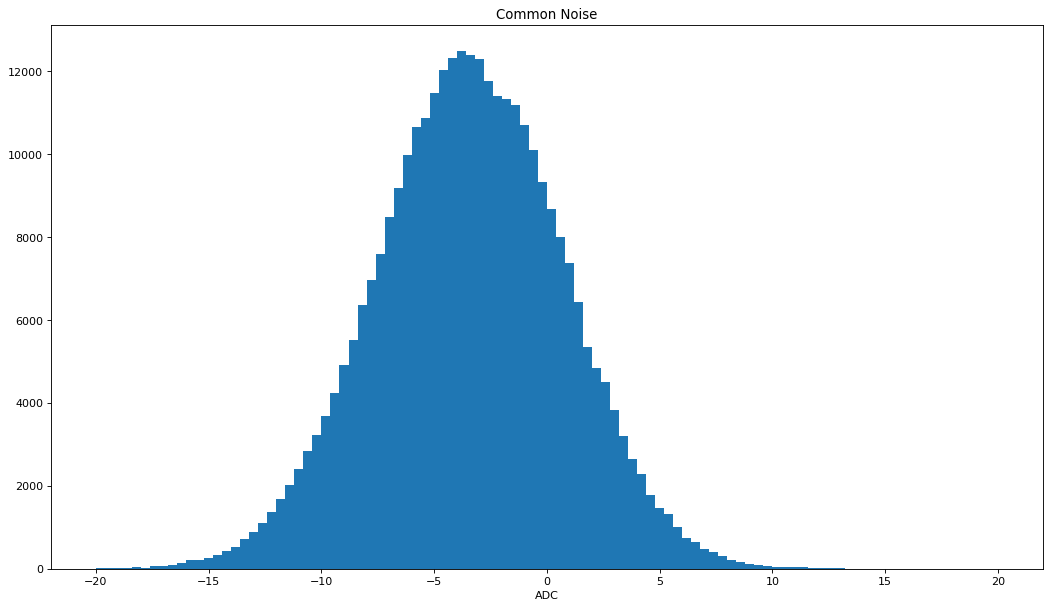

In [4]:
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
plt.hist(cn, bins=100, range=(-20,20))
plt.title('Common Noise')
plt.xlabel('ADC')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa54a8cbe50>],
      dtype=object)

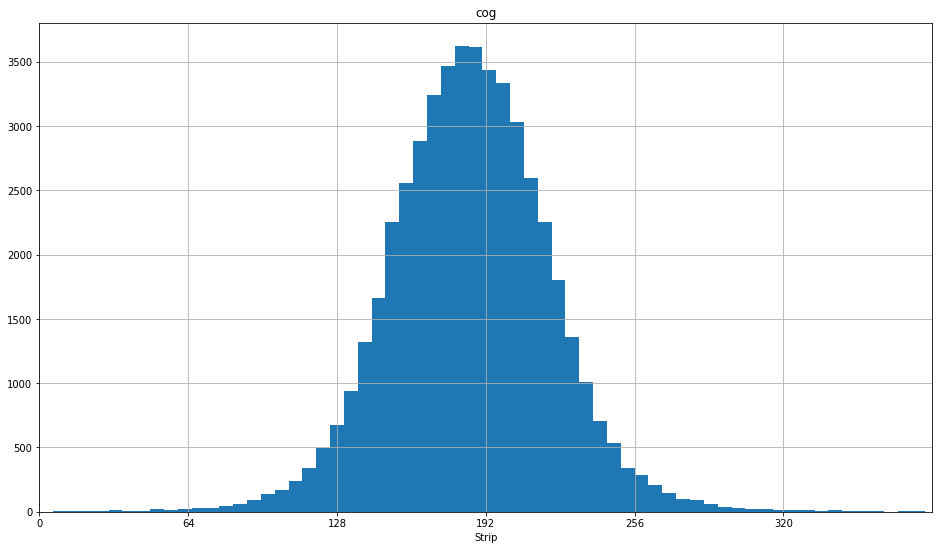

In [5]:
fig = plt.figure(figsize = (16,9))
ax = fig.gca()
major_ticks = np.arange(0, 384, 64)
ax.set_xticks(major_ticks)
ax.set_xlim([0,384])
ax.grid(which='both')
plt.xlabel('Strip')
CLUSTERS.hist(column='cog', bins=64, ax=ax)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa560f63490>],
      dtype=object)

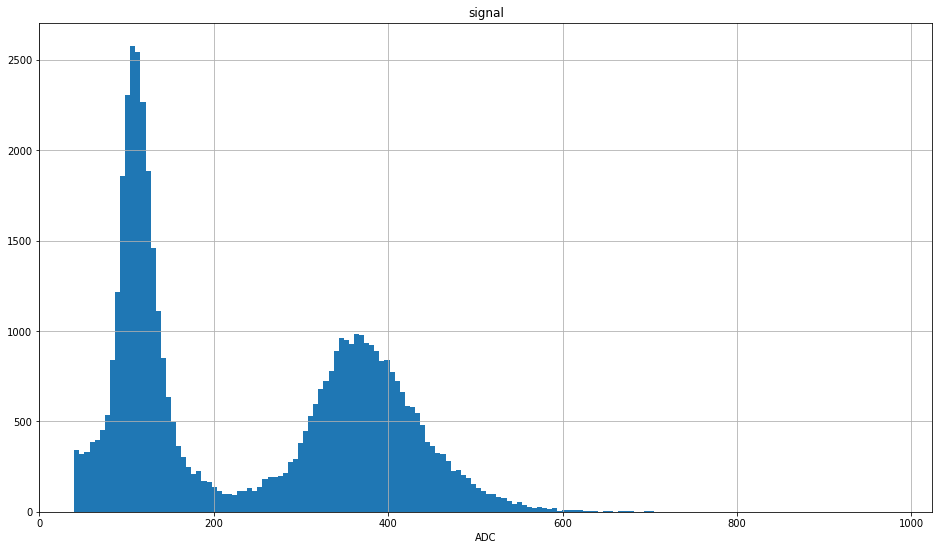

In [7]:
fig = plt.figure(figsize = (16,9))
ax = fig.gca()
ax.set_xlim([0,1024])
ax.grid(which='both')
plt.xlabel('ADC')
CLUSTERS.hist(column='signal', bins=200, ax=ax)

In [8]:
CLUSTERS.describe()

,evt,nclust,seed,signal,width,address,cog
count,49472.000000,49472.000000,49472.000000,49472.000000,49472.000000,49472.000000,49472.000000
mean,27184.406513,1.038365,185.274196,245.095530,1.018718,185.255478,185.272061
std,15404.898311,0.236250,34.483582,141.588372,0.235457,34.480433,34.481278
min,1.000000,1.000000,0.000000,40.004000,1.000000,0.000000,0.000000
25%,13896.750000,1.000000,163.000000,111.720000,1.000000,163.000000,163.000000
50%,27300.500000,1.000000,185.000000,209.525500,1.000000,185.000000,185.000000
75%,40562.250000,1.000000,207.000000,372.944000,1.000000,207.000000,207.000000
max,53761.000000,7.000000,383.000000,1206.382000,43.000000,381.000000,381.000000
